In [1]:
!pip3 install torch

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [0]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))

In [0]:
def scatter_plot():
  p = plt.scatter(X[y==0, 0], X[y==0, 1], c="#0b2466")
  n = plt.scatter(X[y==1, 0], X[y==1, 1], c="red")
  plt.legend((p, n), ("Negative (Class 0)", "Positive (Class 1)"))

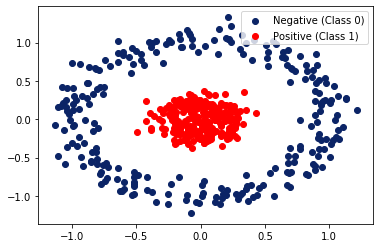

In [5]:
scatter_plot()

In [0]:
class Model(nn.Module):
    def __init__(self, input_size, H1, output_size):
      super().__init__() 
      self.linear = nn.Linear(input_size, H1)
      self.linear2 = nn.Linear(H1, output_size)
    def forward(self, x):
      x = torch.sigmoid(self.linear(x))
      x = torch.sigmoid(self.linear2(x))
      return x
    def predict(self, x):
      pred = self.forward(x)
      if pred >= 0.5:
        return [1, pred]
      else:
        return [0, pred]

In [7]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [0]:
'''
  Binary Cross Entropy (BCE)
    * "Creates a criterion that measures the Binary Cross Entropy between the target and the output."
      [https://pytorch.org/docs/stable/nn.html#bceloss]

    * "Cross-entropy is commonly used to quantify the difference between two probability distributions,
      describes the loss between two probability distributions. It is one of many possible loss functions."
      [https://stackoverflow.com/questions/41990250/what-is-cross-entropy]

    * [https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a]

    * [https://www.youtube.com/watch?v=tRsSi_sqXjI]
'''
criterion = nn.BCELoss()
'''
  Adam algorithm
    * "An algorithm for first-order gradient-based optimization of stochastic objective functions,
      based on adaptive estimates of lower-order moment"
      [https://arxiv.org/abs/1412.6980]
'''
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [9]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 0.7148522138595581
epoch: 1 loss: 0.6947320699691772
epoch: 2 loss: 0.6955163478851318
epoch: 3 loss: 0.7014891505241394
epoch: 4 loss: 0.7013985514640808
epoch: 5 loss: 0.6974702477455139
epoch: 6 loss: 0.6939254403114319
epoch: 7 loss: 0.6928594708442688
epoch: 8 loss: 0.6939384937286377
epoch: 9 loss: 0.6954389810562134
epoch: 10 loss: 0.6958749294281006
epoch: 11 loss: 0.6949177384376526
epoch: 12 loss: 0.6931487321853638
epoch: 13 loss: 0.6913900375366211
epoch: 14 loss: 0.6901611089706421
epoch: 15 loss: 0.6894587874412537
epoch: 16 loss: 0.6888436079025269
epoch: 17 loss: 0.6877667307853699
epoch: 18 loss: 0.685900866985321
epoch: 19 loss: 0.6832477450370789
epoch: 20 loss: 0.6800417304039001
epoch: 21 loss: 0.6765585541725159
epoch: 22 loss: 0.6729682087898254
epoch: 23 loss: 0.6692693829536438
epoch: 24 loss: 0.6653285026550293
epoch: 25 loss: 0.6609663963317871
epoch: 26 loss: 0.6560587882995605
epoch: 27 loss: 0.6505836248397827
epoch: 28 loss: 0.6446025371551

Result using 0.01 as learning rate
![0.01 as learning rate](dnn_sample.jpg)

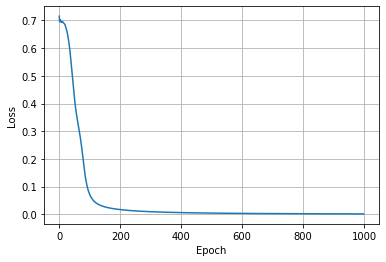

In [10]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()

In [0]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) -0.25, max(X[:, 0])+0.25)
  y_span = np.linspace(min(X[:, 1]) -0.25, max(X[:, 1])+0.25)
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)

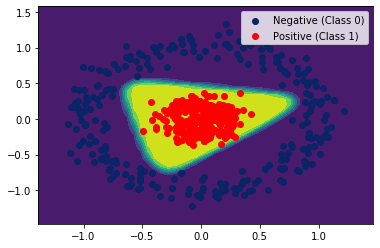

In [12]:
plot_decision_boundary(X, y)
scatter_plot()

The red point had 0.8668801784515381 positive probability, so it belongs to class 1
The red point had 0.0014033968327566981 positive probability, so it belongs to class 0


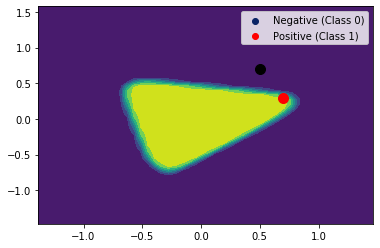

In [20]:
x1 = 0.7
y1 = 0.3
x2 = 0.5
y2 = 0.7

point1 = torch.Tensor([x1, y1])
pred1 = model.predict(point1)
plt.plot([x1], [y1], marker='o', markersize=10, color="red")

point2 = torch.Tensor([x2, y2])
pred2 = model.predict(point2)
plt.plot([x2], [y2], marker='o', markersize=10, color="black")

print("The red point had {} positive probability, so it belongs to class {}".format(pred1[1].item(), pred1[0]))
print("The red point had {} positive probability, so it belongs to class {}".format(pred2[1].item(), pred2[0]))
plot_decision_boundary(X, y)
scatter_plot()